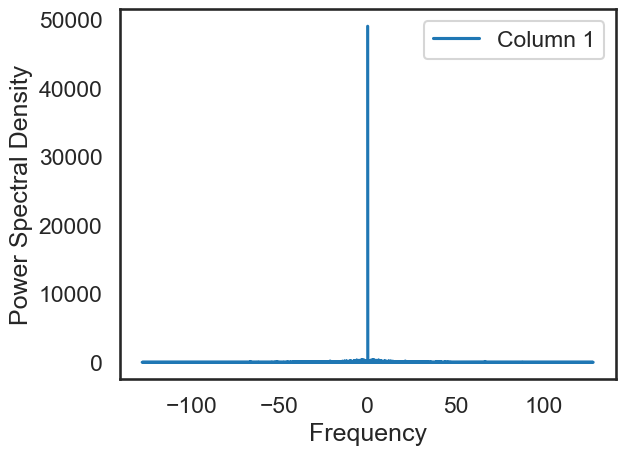

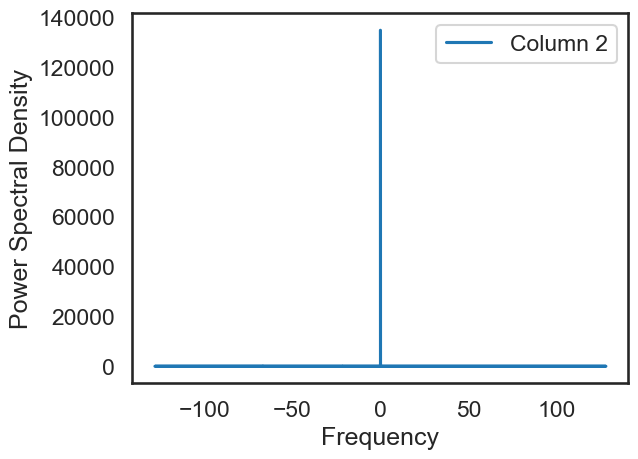

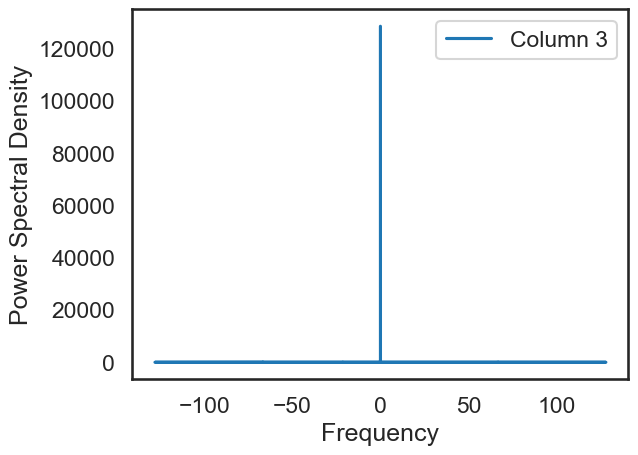

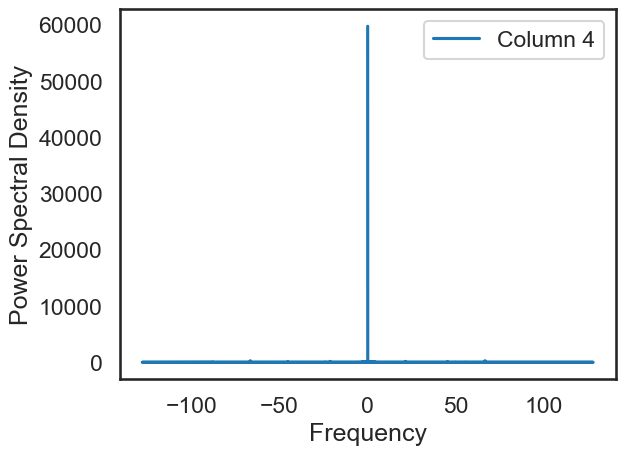

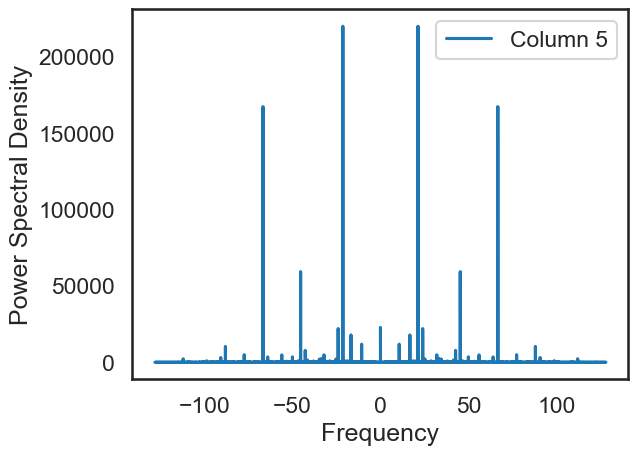

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


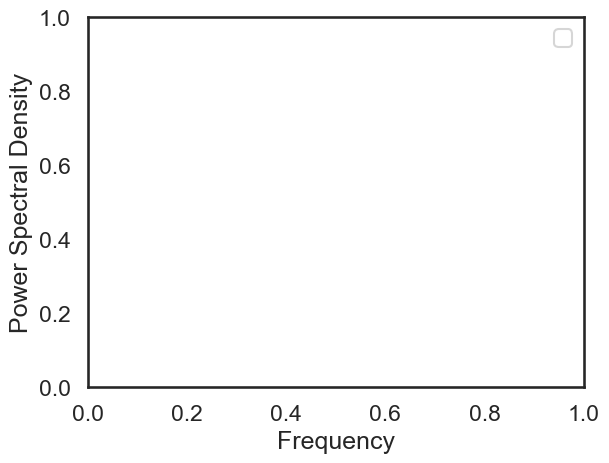

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\AudioVisual\\3_recording.csv')
# Extract the time values (first column) and data (other columns)
time = df.iloc[:, 0].values
data = df.iloc[:, 1:].values

# Compute the PSD for each column of the data
fs = 1 / (time[1] - time[0])  # Sampling frequency
n = len(time)  # Number of samples
frequencies = np.fft.fftfreq(n, 1 / fs)
psd = np.zeros((len(frequencies), data.shape[1]))

for i in range(data.shape[1]):
    fft = np.fft.fft(data[:, i])
    psd[:, i] = np.abs(fft) ** 2 / (n * fs)

# Plot the PSD for each column of the data
for i in range(data.shape[1]):
    plt.plot(frequencies, psd[:, i], label=f"Column {i+1}")
    plt.xlabel('Frequency')
    plt.ylabel('Power Spectral Density')
    plt.legend()
    plt.show()

plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.show()


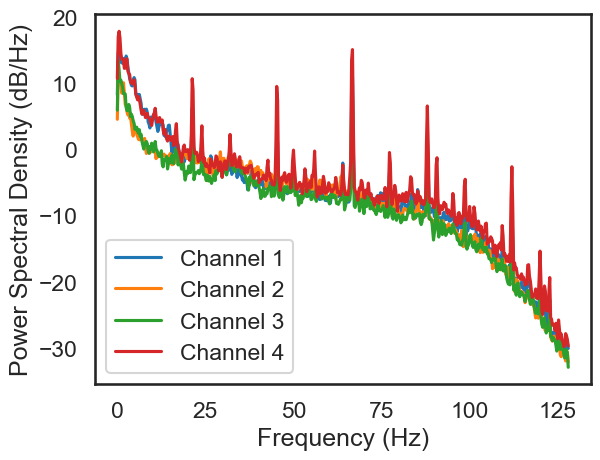

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\AudioVisual\\2_recording.csv')

# Extract time and data columns
time = df.iloc[:, 0].values
data = df.iloc[:, 1:5].values.T

# Compute power spectral density with Welch method
f, psds = signal.welch(data, 1 / (time[1] - time[0]), nperseg=1024)

# Plot the PSDs for each channel
for i in range(data.shape[0]):
    plt.plot(f, 10 * np.log10(psds[i]), label=f"Channel {i+1}")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.legend()
plt.show()


In [13]:
print(f)
f1 = []
for i in f:
    if i < 40:
        f1.append(i)
print(len(f))
print(len(f1))
print( range(data.shape[0]))

[  0.     0.25   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25
   2.5    2.75   3.     3.25   3.5    3.75   4.     4.25   4.5    4.75
   5.     5.25   5.5    5.75   6.     6.25   6.5    6.75   7.     7.25
   7.5    7.75   8.     8.25   8.5    8.75   9.     9.25   9.5    9.75
  10.    10.25  10.5   10.75  11.    11.25  11.5   11.75  12.    12.25
  12.5   12.75  13.    13.25  13.5   13.75  14.    14.25  14.5   14.75
  15.    15.25  15.5   15.75  16.    16.25  16.5   16.75  17.    17.25
  17.5   17.75  18.    18.25  18.5   18.75  19.    19.25  19.5   19.75
  20.    20.25  20.5   20.75  21.    21.25  21.5   21.75  22.    22.25
  22.5   22.75  23.    23.25  23.5   23.75  24.    24.25  24.5   24.75
  25.    25.25  25.5   25.75  26.    26.25  26.5   26.75  27.    27.25
  27.5   27.75  28.    28.25  28.5   28.75  29.    29.25  29.5   29.75
  30.    30.25  30.5   30.75  31.    31.25  31.5   31.75  32.    32.25
  32.5   32.75  33.    33.25  33.5   33.75  34.    34.25  34.5   34.75
  35. 

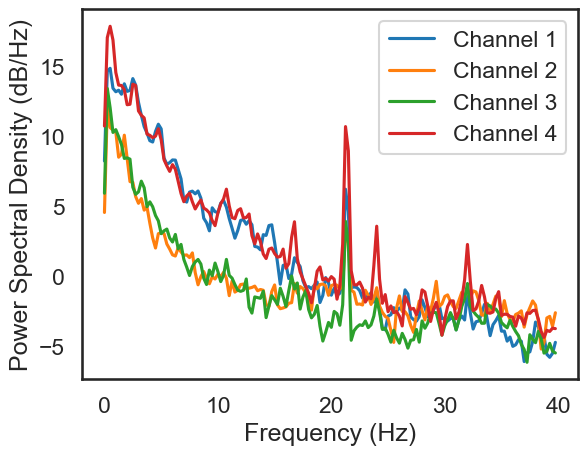

In [14]:
for i in range(data.shape[0]):
        psd_new = (10 * np.log10(psds[i]))[0:160]
        plt.plot(f1, psd_new, label=f"Channel {i+1}")

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.legend()
plt.show()

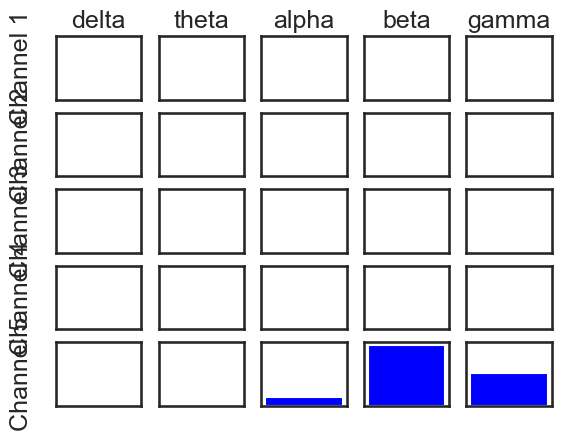

<Figure size 2000x2000 with 0 Axes>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\AudioVisual\\3_recording.csv')

# Extract time and data columns
time = df.iloc[:, 0].values
data = df.iloc[:, 1:].values.T

# Compute power spectral density with Welch method
f, psds = signal.welch(data, 1 / (time[1] - time[0]), nperseg=1024)

# Define frequency bands
bands = {'delta': (0.5, 4),
         'theta': (4, 8),
         'alpha': (8, 13),
         'beta': (13, 30),
         'gamma': (30, 50)}

# Compute power in each frequency band for each channel
power = {}
for band, (fmin, fmax) in bands.items():
    idx = np.logical_and(f >= fmin, f < fmax)
    for i in range(data.shape[0]):
        channel = f'Channel {i+1}'
        if channel not in power:
            power[channel] = {}
        power[channel][band] = np.trapz(psds[i][idx], f[idx])

# Plot the power in each band for each channel
fig, axs = plt.subplots(nrows=len(power), ncols=len(bands), sharex=True, sharey=True)
for i, (channel, band_power) in enumerate(power.items()):
    for j, (band, value) in enumerate(band_power.items()):
        axs[i, j].bar(0, value, color='blue')
        axs[i, j].set_xticklabels('')
        axs[i, j].set_yticklabels('')
        if i == 0:
            axs[i, j].set_title(band)
        if j == 0:
            axs[i, j].set_ylabel(channel)
plt.figure(figsize=(20,20))
plt.show()


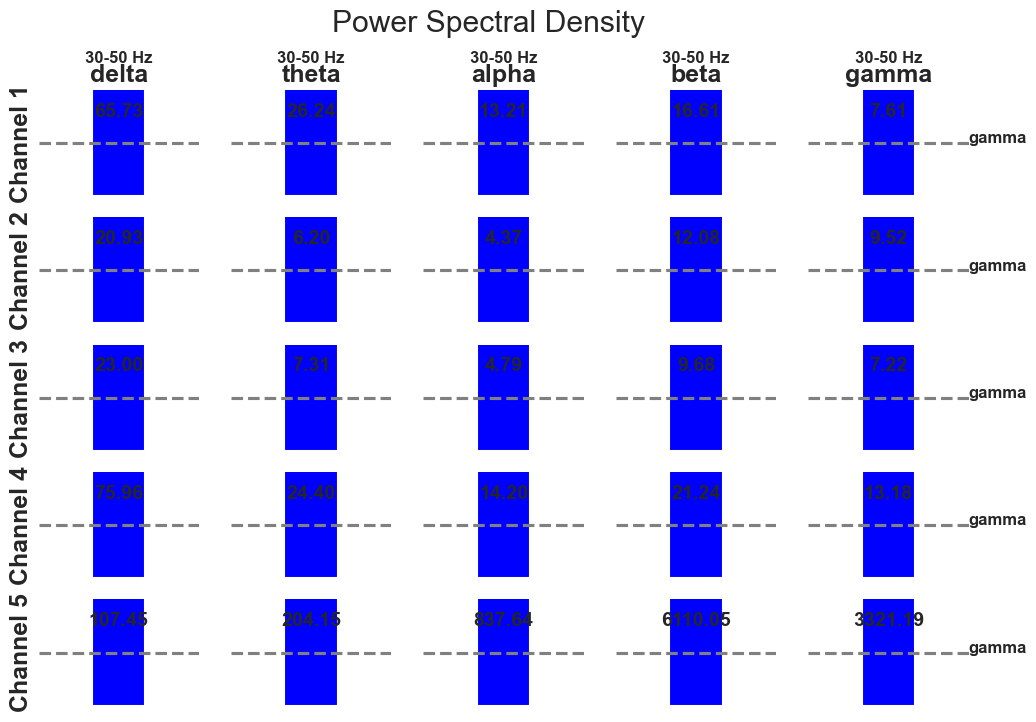

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\AudioVisual\\2_recording.csv')

# Extract time and data columns
time = df.iloc[:, 0].values
data = df.iloc[:, 1:].values.T

# Compute power spectral density with Welch method
f, psds = signal.welch(data, 1 / (time[1] - time[0]), nperseg=1024)

# Define frequency bands
bands = {'delta': (0.5, 4),
         'theta': (4, 8),
         'alpha': (8, 13),
         'beta': (13, 30),
         'gamma': (30, 50)}

# Compute power in each frequency band for each channel
power = {}
for band, (fmin, fmax) in bands.items():
    idx = np.logical_and(f >= fmin, f < fmax)
    for i in range(data.shape[0]):
        channel = f'Channel {i+1}'
        if channel not in power:
            power[channel] = {}
        power[channel][band] = np.trapz(psds[i][idx], f[idx])

# Plot the power in each band for each channel
fig, axs = plt.subplots(nrows=len(power), ncols=len(bands), sharex=True, sharey=True, figsize=(12, 8))
fig.suptitle('Power Spectral Density')
for i, (channel, band_power) in enumerate(power.items()):
    for j, (band, value) in enumerate(band_power.items()):
        ax = axs[i, j]
        ax.bar(0, value, color='blue', width=0.2)
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title(band, fontweight='bold')
        if j == 0:
            ax.set_ylabel(channel, fontweight='bold')
        ax.set_xlim(-0.3, 0.3)
        ax.set_ylim(0, 0.2)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.axhline(y=0.1, color='grey', linestyle='--')
        ax.text(0, 0.15, f'{value:.2f}', ha='center', fontsize=14, fontweight='bold')
        if j == len(bands) - 1:
            ax.text(0.3, 0.1, band, ha='left', fontsize=12, fontweight='bold')
        if i == 0:
            ax.text(0, 0.25, f'{fmin}-{fmax} Hz', ha='center', fontsize=12, fontweight='bold')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()


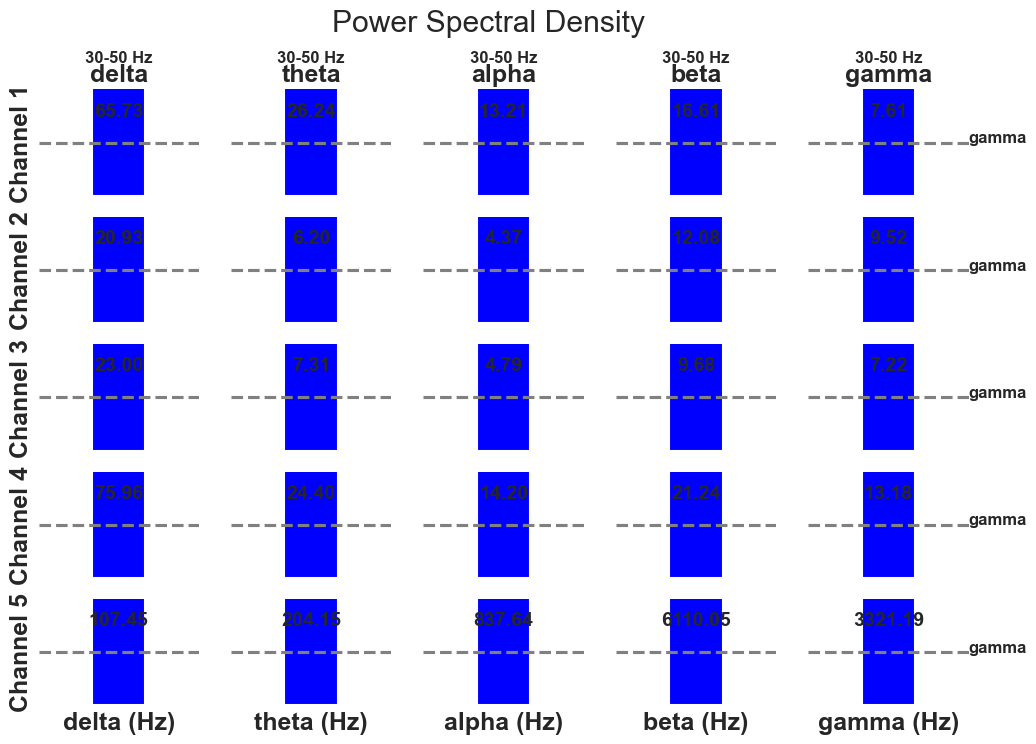

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load CSV file into a pandas DataFrame
df = pd.read_csv('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\AudioVisual\\2_recording.csv')

# Extract time and data columns
time = df.iloc[:, 0].values
data = df.iloc[:, 1:].values.T
#data = data*1e-6
# Compute power spectral density with Welch method
f, psds = signal.welch(data, 1 / (time[1] - time[0]), nperseg=1024)

# Define frequency bands
bands = {'delta': (0.5, 4),
         'theta': (4, 8),
         'alpha': (8, 13),
         'beta': (13, 30),
         'gamma': (30, 50)}

# Compute power in each frequency band for each channel
power = {}
for band, (fmin, fmax) in bands.items():
    idx = np.logical_and(f >= fmin, f < fmax)
    for i in range(data.shape[0]):
        channel = f'Channel {i+1}'
        if channel not in power:
            power[channel] = {}
        power[channel][band] = np.trapz(psds[i][idx], f[idx])

# Plot the power in each band for each channel
fig, axs = plt.subplots(nrows=len(power), ncols=len(bands), sharex=True, sharey=True, figsize=(12, 8))
fig.suptitle('Power Spectral Density')
for i, (channel, band_power) in enumerate(power.items()):
    for j, (band, value) in enumerate(band_power.items()):
        ax = axs[i, j]
        ax.bar(0, value, color='blue', width=0.2)
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title(band, fontweight='bold')
        if j == 0:
            ax.set_ylabel(f'{channel}', fontweight='bold') #(dB/Hz)
        if i == len(power) - 1:
            ax.set_xlabel(f'{band} (Hz)', fontweight='bold')
        ax.set_xlim(-0.3, 0.3)
        ax.set_ylim(0, 0.2)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.axhline(y=0.1, color='grey', linestyle='--')
        ax.text(0, 0.15, f'{value:.2f}', ha='center', fontsize=14, fontweight='bold')
        if j == len(bands) - 1:
            ax.text(0.3, 0.1, band, ha='left', fontsize=12, fontweight='bold')
        if i == 0:
            ax.text(0, 0.25, f'{fmin}-{fmax} Hz', ha='center', fontsize=12, fontweight='bold')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
